# 4. Point mapping

Now that we know how to do the simple plotting, we're going to learn how to display more information than just location.

**INSTRUCTOR NOTES**:
- Datasets used:
    - "../notebook_data/parcels/parcel_pts_rand30pct.geojson"
    - "../notebook_data/BerkeleyCityLimits.zip"

- Expected time to complete:
    - Lecture + Questions: 20 minutes
    - Challenges: 5 minutes

### Import packages

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 4.1 Subset parcels data

Before we move into the actual plotting, we're going to take our Alameda County parcel data and subset it to Berkeley.

In [2]:
berkeley_parcels_gdf = gpd.read_file("../notebook_data/parcels/parcel_pts_rand30pct.geojson")

In [3]:
berkeley_parcels_gdf

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,SIT_CITY,SIT_STATE,SIT_ZIP,SIT_ZIP4,LAND_VALUE,IMPR_VALUE,TOT_VALUE,totvalue2,geometry
0,1-111-1,001 011100100,CA,Alameda,06001,229,None,Brush,St,229 BRUSH ST,Oakland,CA,94607,3009,22057,38064,60121,60121,POINT (-122.28340 37.79949)
1,1-113-2-2,001 011300202,CA,Alameda,06001,400,None,Market,St,400 MARKET ST,Oakland,CA,94607,3034,375012,349588,724600,724600,POINT (-122.28308 37.80071)
2,1-115-20,001 011502000,CA,Alameda,06001,724,None,4th,St,724 4TH ST,Oakland,CA,94607,3018,20825,9193,30018,30018,POINT (-122.28185 37.80021)
3,1-115-26,001 011502600,CA,Alameda,06001,410,None,Brush,St,410 BRUSH ST,Oakland,CA,94607,3014,10484,0,10484,10484,POINT (-122.28225 37.80034)
4,1-115-28,001 011502800,CA,Alameda,06001,725,None,4th,St,725 4TH ST,Oakland,CA,94607,3017,38865,298480,337345,337345,POINT (-122.28227 37.79983)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34626,9-746-16,009 074601600,CA,Alameda,06001,467,None,34th,St,467 34TH ST,Oakland,CA,94609,2833,105817,94935,204370,204370,POINT (-122.26493 37.82184)
34627,9-746-27,009 074602700,CA,Alameda,06001,450,None,30th,St,450 30TH ST,Oakland,CA,94609,3302,749959,1121120,1871079,1871079,POINT (-122.26650 37.81966)
34628,9-746-29,009 074602900,CA,Alameda,06001,418,None,30th,St,418 30TH ST,Oakland,CA,94609,3309,653683,879728,1533411,1533411,POINT (-122.26507 37.81932)
34629,9-746-38,009 074603800,CA,Alameda,06001,365,None,Hawthorne,Ave,365 HAWTHORNE AVE,Oakland,CA,94609,3107,629529,4766769,5396298,5396298,POINT (-122.26333 37.82060)


In [4]:
berkeley_parcels_gdf = berkeley_parcels_gdf.loc[berkeley_parcels_gdf['SIT_CITY']== 'Berkeley'].copy()
berkeley_parcels_gdf

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,SIT_CITY,SIT_STATE,SIT_ZIP,SIT_ZIP4,LAND_VALUE,IMPR_VALUE,TOT_VALUE,totvalue2,geometry
3418,16-1410-1-1,016 141000101,CA,Alameda,06001,3101,None,Benvenue,Ave,3101 BENVENUE AVE,Berkeley,CA,94705,2511,15543,180306,195849,195849,POINT (-122.25370 37.85367)
3421,16-1410-3-3,016 141000303,CA,Alameda,06001,2636,None,Woolsey,St,2636 WOOLSEY ST,Berkeley,CA,94705,2537,30350,27775,51125,51125,POINT (-122.25336 37.85360)
24550,48H-7514-4,048H751400400,CA,Alameda,06001,4949,None,Grizzly Peak,Blvd,4949 GRIZZLY PEAK BLVD,Berkeley,CA,94705,1726,212620,436595,642215,642215,POINT (-122.22280 37.86352)
24551,48H-7515-12,048H751501200,CA,Alameda,06001,4849,None,Grizzly Peak,Blvd,4849 GRIZZLY PEAK BLVD,Berkeley,CA,94705,1724,0,0,0,0,POINT (-122.22506 37.86644)
24733,48H-7600-11,048H760001100,CA,Alameda,06001,27,None,Dawn,St,27 DAWN ST,Berkeley,CA,94705,1707,675000,1575000,2243000,2243000,POINT (-122.22744 37.86134)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33976,66-2760-12-4,066 276001204,CA,Alameda,06001,600,None,Cleveland,Ave,600 CLEVELAND AVE,Berkeley,CA,94710,1008,575157,0,575157,575157,POINT (-122.30857 37.89404)
33977,66-2760-12-5,066 276001205,CA,Alameda,06001,600,None,Cleveland,Ave,600 CLEVELAND AVE,Berkeley,CA,94710,1008,522870,1568610,2091480,2091480,POINT (-122.30850 37.89374)
33978,66-2760-14-8,066 276001408,CA,Alameda,06001,540,None,Cleveland,Ave,540 CLEVELAND AVE,Berkeley,CA,94710,1007,104823,119268,224091,224091,POINT (-122.30927 37.89568)
33979,67-2861-1,067 286100100,CA,Alameda,06001,1500,None,Visalia,Ave,1500 VISALIA AVE,Berkeley,CA,94707,1526,138900,324100,456000,456000,POINT (-122.28698 37.89804)


In [5]:
berkeley_parcels_gdf.dtypes

APN             object
APN2            object
STATE           object
COUNTY          object
FIPS            object
SIT_HSE_NU      object
SIT_DIR         object
SIT_STR_NA      object
SIT_STR_SF      object
SIT_FULL_S      object
SIT_CITY        object
SIT_STATE       object
SIT_ZIP         object
SIT_ZIP4        object
LAND_VALUE      object
IMPR_VALUE      object
TOT_VALUE       object
totvalue2        int64
geometry      geometry
dtype: object

## 4.2 Proportional Color Maps
**Proportional color maps** linearly scale the `color` of a point symbol by the data values.

Let's try this by creating a map of total value (`TOT_VALUE`).

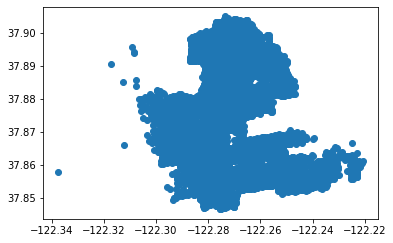

In [6]:
berkeley_parcels_gdf.plot()

In [7]:
berkeley_parcels_gdf['totvalue2'].describe()

count    7.595000e+03
mean     4.780277e+05
std      1.154006e+06
min      0.000000e+00
25%      1.227120e+05
50%      3.226850e+05
75%      5.833140e+05
max      4.771708e+07
Name: totvalue2, dtype: float64

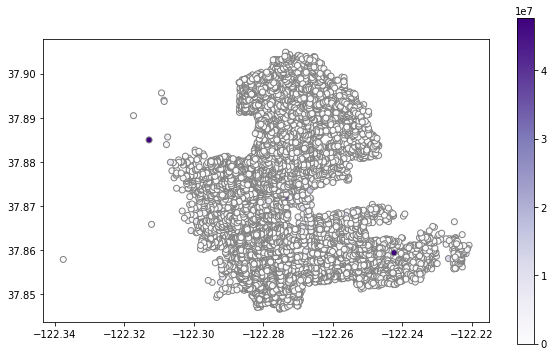

In [8]:
berkeley_parcels_gdf.plot(column="totvalue2", 
                          cmap="Purples", edgecolor="grey", 
                          figsize =(10,6),legend=True)
plt.show()

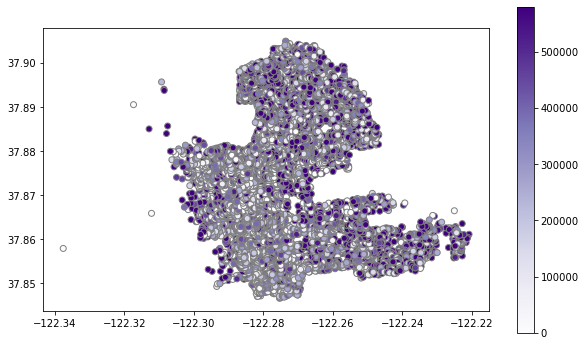

In [9]:
berkeley_parcels_gdf.plot(column="totvalue2", 
                          cmap="Purples", edgecolor="grey", 
                          figsize =(10,6),legend=True,
                         vmax = 5.8e5)
plt.show()

When you see that continuous color bar in the legend you know that the mapping of data values to colors is not classified.


## 4.3 Graduated Color Maps

We can also create **graduated color maps** by binning data values before associating them with colors. These are just like choropleth maps but that term is used for polygon data. 

Graduated color maps use the same syntax as the choropleth maps above - you create them by setting a value for `scheme`. 

Below, we copy the code we used above to create a choropleth, but we change the name of the geodataframe to use the point gdf. 

In [10]:
berkeley_parcels_gdf['totvalue2'].quantile(q=.25)

122712.0

In [11]:
totvalue_bins = [berkeley_parcels_gdf['totvalue2'].quantile(q=.25),
                berkeley_parcels_gdf['totvalue2'].quantile(q=.5),
                berkeley_parcels_gdf['totvalue2'].quantile(q=.75)]
print(totvalue_bins)

[122712.0, 322685.0, 583314.0]


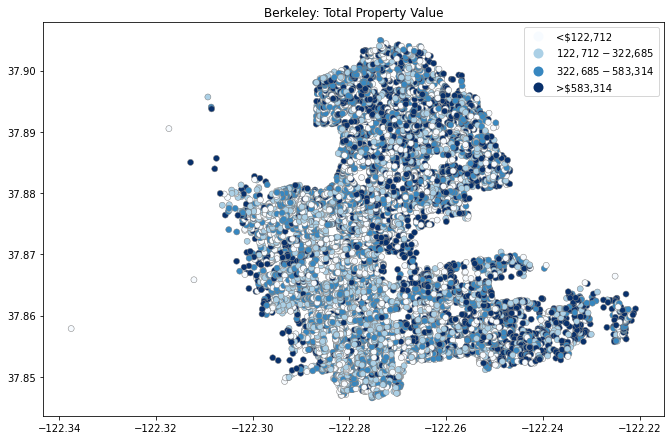

In [12]:
fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
berkeley_parcels_gdf.plot(column=(berkeley_parcels_gdf['totvalue2']), 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':totvalue_bins},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['<$122,712','$122,712 - $322,685','$322,685 - $583,314','>$583,314']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Berkeley: Total Property Value")
plt.show()

The syntax for a choropleth and graduated color map is the same, although some options only apply to one or the other.

- Uncomment the `markersize` parameter above to see how you can further customize a graduated color map.

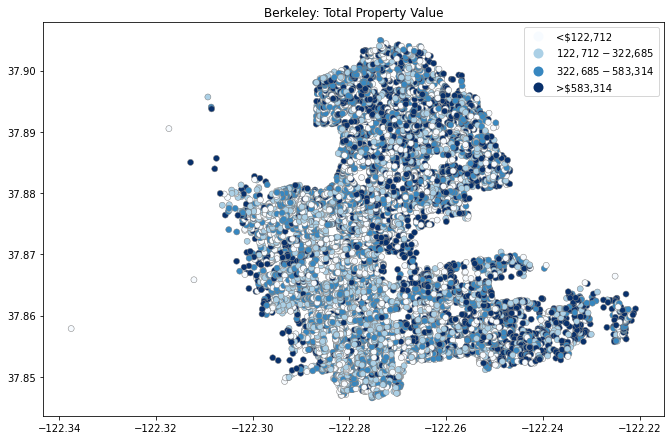

In [13]:
# EDIT THIS CODE

fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
berkeley_parcels_gdf.plot(column=(berkeley_parcels_gdf['totvalue2']), 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':totvalue_bins},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['<$122,712','$122,712 - $322,685','$322,685 - $583,314','>$583,314']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Berkeley: Total Property Value")
plt.show()

## 4.4 Proportional Symbol Maps

Instead of changing the `color `of the points based on the data values, we can change their `size`.

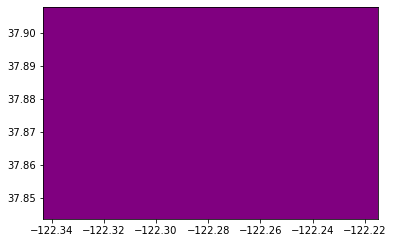

In [14]:
berkeley_parcels_gdf.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize=berkeley_parcels_gdf['totvalue2'] # set size of point markers by the values in c_renters column
                         )
plt.show()

Oops! When we set the marker size by the column value our markers are too big. Let's try scaling them down so they don't overlap as much.

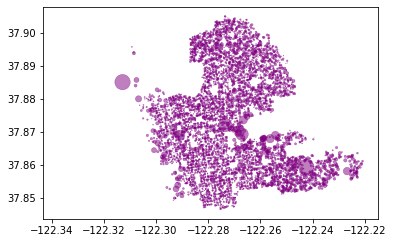

In [15]:
berkeley_parcels_gdf.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize=berkeley_parcels_gdf['totvalue2']/200000 # set size of point markers by the values in c_renters column
                         )
plt.show()

That's a bit better, but alas Goldilocks, it's still not quite right!

Instead of guessing how to adjust the values we can write a function to recode our values from the columns min and max to the marker size min and max.

In [16]:
def rescale_val(val, oldmin, oldmax, newmin, newmax):
    '''
    Rescale a value from a old range to a new range
    '''
    old_range = oldmax - oldmin
    new_range = newmax - newmin
    new_val = int((new_range * (val - oldmin)/ old_range) + newmin)
    return new_val


To see how our function works, let's apply it to our geodataframe.  

Here we set the output size for the markers to range from 10 to 500

In [17]:
berkeley_parcels_gdf['totvalue2'][3418]

195849

In [18]:
rescale_val(berkeley_parcels_gdf['totvalue2'][3418],
        berkeley_parcels_gdf['totvalue2'].min(),
        berkeley_parcels_gdf['totvalue2'].max(),
        5,
        200)

5

In [19]:
berkeley_parcels_gdf['totvalue2'].apply(lambda x: 
                                        rescale_val(x,
                                                    berkeley_parcels_gdf['totvalue2'].min(),
                                                    berkeley_parcels_gdf['totvalue2'].max(),
                                                    5,
                                                    200)
                                       )                                                           

3418      5
3421      5
24550     7
24551     5
24733    14
         ..
33976     7
33977    13
33978     5
33979     6
33980     5
Name: totvalue2, Length: 7595, dtype: int64

Now, let's use the function to make our plot.

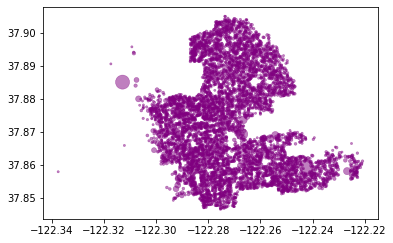

In [20]:
# Get our marker_sizes based on our column values
marker_sizes = berkeley_parcels_gdf['totvalue2'].apply(lambda x: 
                                        rescale_val(x,
                                                    berkeley_parcels_gdf['totvalue2'].min(),
                                                    berkeley_parcels_gdf['totvalue2'].max(),
                                                    5,
                                                    200))        

# Create the point map
berkeley_parcels_gdf.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize= marker_sizes            
                         )
plt.show()

> **Pro-tip**: Unfortunately, `Geopandas.plot` does not provide an easy way to add legends to point symbol maps!

That's a lot of better, though the code looks a lot more complex!

Now let's overlay it over a map of our tract shapes.

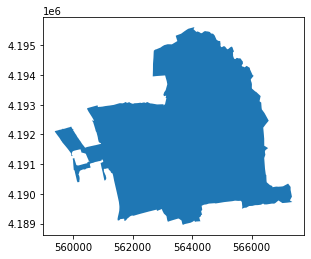

In [21]:
berkeley_outline = gpd.read_file("zip://../notebook_data/BerkeleyCityLimits.zip")
berkeley_outline.plot()

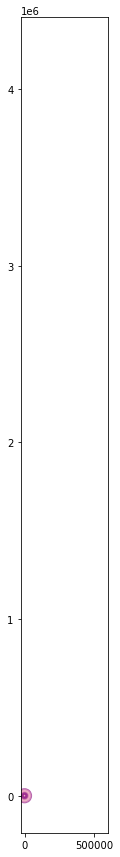

In [22]:
# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (15,15)) 


# Add the census tract polygons as our background layer
berkeley_outline.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

# Create a list of the marker sizes based on our data values
marker_sizes = berkeley_parcels_gdf['totvalue2'].apply(lambda x: 
                                        rescale_val(x,
                                                    berkeley_parcels_gdf['totvalue2'].min(),
                                                    berkeley_parcels_gdf['totvalue2'].max(),
                                                    5,
                                                    200))
# Add the points to the map
berkeley_parcels_gdf.plot(ax=ax,
                          edgecolor='purple',
                          color="pink",  
                          alpha=0.35, 
                          linewidths=1,
                          legend=True,
                          markersize = marker_sizes
                        )      


plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="../../assets/images/discussion.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

What do you think happened here?

In [23]:
# Write your thoughts here

### BONUS: Graduated symbol maps

`Graduated symbol maps` are also a great method for mapping points.  These are just like graduated color maps but instead of associating symbol color with data values they associate point size. Similarly,graduated symbol maps use `classification schemes` to set the size of point symbols. 

> We demonstrate how to make graduated symbol maps along with some other mapping techniques in the `Optional Mapping notebook` which we encourage you to explore on your own.

<div style="display:inline-block;vertical-align:top;">
    <img src="../../assets/images/IMG_8641.jpg" align=center width=600 > 
</div>  
<div style="display:inline-block;">

## 4.5 Challenge

Repeat the Total value map of `LAND_VALUE` and experiment with the different values for the plot.


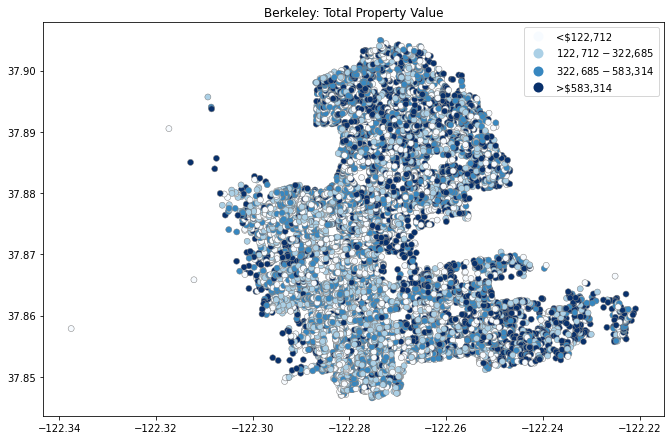

In [24]:
# EDIT THIS CODE

fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
berkeley_parcels_gdf.plot(column=(berkeley_parcels_gdf['totvalue2']), 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':totvalue_bins},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['<$122,712','$122,712 - $322,685','$322,685 - $583,314','>$583,314']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Berkeley: Total Property Value")
plt.show()

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="../../assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        
